In [1]:
#  import the libraries needed

# Data handling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import joblib
import warnings

# Data preprocessing
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE

# Machine learning (Deep Learning)
import tensorflow as tf
from tensorflow.keras.layers import InputLayer, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Machine learning (Traditional Models)
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb

# Model selection
from sklearn.model_selection import RandomizedSearchCV

# Model evaluation
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, classification_report

# Global settings
%matplotlib inline
sns.set_style('darkgrid')
sns.set_palette('bright')
warnings.filterwarnings(action='ignore', category=FutureWarning)
pd.set_option('display.max_row', 20)

In [2]:
# import the data to be used
ecom_cus_df = pd.read_excel("/content/drive/MyDrive/E Commerce Dataset.xlsx", sheet_name="E Comm")

In [3]:
# get a sample of the data to know how the data looks like
ecom_cus_df.sample(20)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
742,50743,0,23.0,Computer,1,8.0,Credit Card,Female,1.0,3,Grocery,5,Divorced,3,0,22.0,NaN,2.0,2.0,278.56
3120,53121,0,9.0,Mobile Phone,1,29.0,Debit Card,Male,3.0,6,Mobile Phone,3,Single,2,0,16.0,3.0,5.0,4.0,167.30
624,50625,1,15.0,Mobile Phone,3,8.0,E wallet,Female,2.0,5,Others,2,Divorced,2,0,NaN,5.0,6.0,9.0,298.45
2745,52746,0,11.0,Computer,2,7.0,UPI,Male,NaN,3,Mobile,4,Married,1,1,11.0,0.0,1.0,2.0,129.91
4440,54441,0,27.0,Mobile Phone,1,10.0,Credit Card,Male,3.0,4,Grocery,3,Married,5,1,NaN,2.0,2.0,4.0,300.84
5349,55350,0,7.0,Mobile Phone,3,9.0,Credit Card,Male,4.0,4,Laptop & Accessory,1,Married,3,0,15.0,2.0,2.0,5.0,180.05
3867,53868,0,24.0,Mobile Phone,1,24.0,Debit Card,Female,3.0,5,Fashion,5,Married,7,0,16.0,2.0,NaN,12.0,257.69
4559,54560,0,5.0,Phone,1,7.0,Debit Card,Male,4.0,5,Mobile Phone,5,Married,3,0,13.0,4.0,4.0,3.0,147.18
4284,54285,1,1.0,Mobile Phone,3,13.0,Debit Card,Male,4.0,6,Laptop & Accessory,3,Married,6,1,19.0,1.0,8.0,8.0,186.72
948,50949,0,1.0,Mobile Phone,1,35.0,Debit Card,Male,3.0,5,Laptop & Accessory,4,Divorced,2,0,14.0,1.0,1.0,7.0,165.49


In [4]:
# get information about the data
ecom_cus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

#Data Preprocessing

There are no duplicates in the data for we will not be removing or deal with duplicates

In [5]:
# Checking for duplicates in the dataset
ecom_cus_df.duplicated().sum()

0

In [6]:
# drop columns that will not be used for modelling and analysis
ecom_cus_df.drop(columns=['CustomerID', 'NumberOfDeviceRegistered','NumberOfAddress'], inplace=True)

In [7]:
# print categorical, numerical and ordinal columns
categorical_columns = ecom_cus_df.select_dtypes(include=['object']).columns
numerical_columns = ecom_cus_df.select_dtypes(include=['float64']).columns
ordinal_columns = ecom_cus_df.select_dtypes(include=['int64']).columns

# print them
print(f"Categorical columns {categorical_columns}\n")
print(f"Numerical columns {numerical_columns}\n")
print(f"Ordinal columns {ordinal_columns}")

Categorical columns Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')

Numerical columns Index(['Tenure', 'WarehouseToHome', 'HourSpendOnApp',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

Ordinal columns Index(['Churn', 'CityTier', 'SatisfactionScore', 'Complain'], dtype='object')


In [8]:
# check for missing values
ecom_cus_df.isna().sum()

,0
Churn,0
Tenure,264
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,251
PreferredPaymentMode,0
Gender,0
HourSpendOnApp,255
PreferedOrderCat,0
SatisfactionScore,0


In [9]:
# lets check the descriptive statistics of the numerical columns before and after handling the missing valus
ecom_cus_df[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
OrderAmountHikeFromlastYear,5365.0,15.707922,3.675485,11.0,13.00,15.00,18.0000,26.00
CouponUsed,5374.0,1.751023,1.894621,0.0,1.00,1.00,2.0000,16.00
OrderCount,5372.0,3.008004,2.939680,1.0,1.00,2.00,3.0000,16.00
DaySinceLastOrder,5323.0,4.543491,3.654433,0.0,2.00,3.00,7.0000,46.00
CashbackAmount,5630.0,177.223030,49.207036,0.0,145.77,163.28,196.3925,324.99


For handling missing values, we will investigate potential strong relationships between customers who used coupons and other columns. We believe that a person's coupon usage could depend on various factors, such as their years spent on the platform. This analysis will help us decide whether to use a custom function or the median value to fill in the missing data, taking into consideration any outliers.

In [10]:
correlation_matrix = ecom_cus_df.select_dtypes(['float64','int64']).corr()  # This computes the Pearson correlation matrix
coupon_correlation = correlation_matrix['CouponUsed'].drop('CouponUsed')  # Extracts correlations with 'CouponUsed'
coupon_correlation

,CouponUsed
Churn,-0.008264
Tenure,0.129035
CityTier,0.021456
WarehouseToHome,-0.003935
HourSpendOnApp,0.191528
SatisfactionScore,0.017936
Complain,-0.008174
OrderAmountHikeFromlastYear,0.033201
OrderCount,0.745245
DaySinceLastOrder,0.358930


In [11]:
# print the mean for both Coupon used and OrderCount
print(ecom_cus_df['CouponUsed'].mean())
print(ecom_cus_df['OrderCount'].mean())

1.7510234462225531
3.0080044676098288


Based on the correlations, it's clear that the use of coupons is closely related to the number of orders placed by each person. On average, we found that the most common order counts associated with coupon use are 2 and 3, respectively.

To handle missing values, we've implemented a function that checks for missing data points. If a data point is missing and the associated order count is greater than 3, the function assigns a coupon value of 3 (a predetermined number); otherwise, it assigns a value of 1.

For any remaining missing values in other columns, we'll use the median imputation method.

In [12]:
# create the function for the imputation
def fill_coupon_based_on_order(row):
  if pd.isna(row['CouponUsed']):
    if row['OrderCount'] > 3:
      return 3 #Since mean is 2, if order count is greater than mean order count, return a value greater than mean coupon used.
    else:
      return 1 #Else return a value less than the mean coupon used.
  else:
    return row['CouponUsed']

ecom_cus_df['CouponUsed'] = ecom_cus_df.apply(fill_coupon_based_on_order, axis=1)

In [13]:
# impute the missing values for the remaining columns
medians = ecom_cus_df[numerical_columns].median()
ecom_cus_df[numerical_columns] = ecom_cus_df[numerical_columns].fillna(medians)

In [14]:
# now check the descriptive statistics again
ecom_cus_df[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,5630.0,10.134103,8.357951,0.0,3.00,9.00,15.0000,61.00
WarehouseToHome,5630.0,15.566785,8.345961,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5630.0,2.934636,0.705528,0.0,2.00,3.00,3.0000,5.00
OrderAmountHikeFromlastYear,5630.0,15.674600,3.591058,11.0,13.00,15.00,18.0000,26.00
CouponUsed,5630.0,1.758437,1.863501,0.0,1.00,1.00,2.0000,16.00
OrderCount,5630.0,2.961812,2.879248,1.0,1.00,2.00,3.0000,16.00
DaySinceLastOrder,5630.0,4.459325,3.570626,0.0,2.00,3.00,7.0000,46.00
CashbackAmount,5630.0,177.223030,49.207036,0.0,145.77,163.28,196.3925,324.99


In [15]:
ecom_cus_df['PreferredLoginDevice'] = ecom_cus_df['PreferredLoginDevice'].replace(['Phone', 'Mobile Phone'], 'Mobile Phone')

ecom_cus_df['PreferedOrderCat'] = ecom_cus_df['PreferedOrderCat'].replace('Mobile', 'Mobile Phone')

ecom_cus_df['PreferredPaymentMode'] = ecom_cus_df['PreferredPaymentMode'].replace({
    'COD': 'Cash on Delivery',
    'CC': 'Credit Card'
})

In [16]:
print(f"{ecom_cus_df['PreferredLoginDevice'].value_counts()}\n")
print(f"{ecom_cus_df['PreferredPaymentMode'].value_counts()}")

PreferredLoginDevice
Mobile Phone    3996
Computer        1634
Name: count, dtype: int64

PreferredPaymentMode
Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: count, dtype: int64


# Exloratory Data Analysis

In [17]:
# print categorical, numerical and ordinal columns
categorical_columns = ecom_cus_df.select_dtypes(include=['object']).columns
numerical_columns = ecom_cus_df.select_dtypes(include=['float64']).columns
ordinal_columns = ecom_cus_df.select_dtypes(include=['int64']).columns


## Univariate Analysis

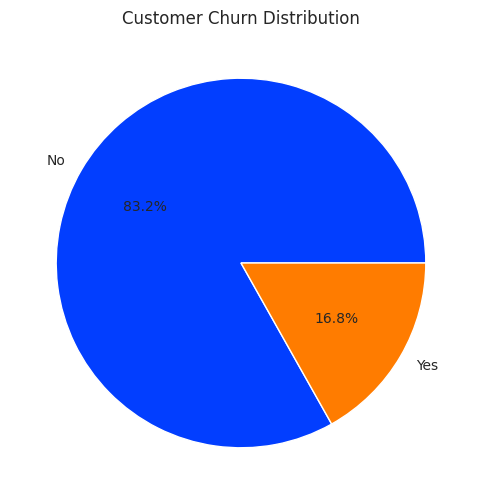

In [18]:
# churn Distribution
# Mapping the churn column to 'Yes' and 'No'
ecom_cus_df['Churn'] = ecom_cus_df['Churn'].map({1: 'Yes', 0: 'No'})

# Plotting the pie chart
churn_counts = ecom_cus_df['Churn'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%')
plt.title('Customer Churn Distribution')

plt.show()


### Numerical Distributions

In [19]:
def plot_variables(data, cols=2, fig_size=(14, 8)):
    """
    This function takes the data to be plotted, the number of columns to be used in the grid layout,
    and the figure size. It automatically determines the type of each variable and plots it
    accordingly (categorical vs numerical).
    """
    n_vars = len(data.columns)
    rows = (n_vars + cols - 1) // cols  # calculate the number of rows needed

    fig, axes = plt.subplots(ncols=cols, nrows=rows, figsize=fig_size)
    axes = axes.flatten()

    for i, col in enumerate(data.columns):
        ax = axes[i]
        if data[col].dtype == 'object':  # Categorical data
            # arrange values in ascending orger
            # value_counts = data[col].value_counts().sort_index()
            sns.countplot(data=data, x=col, ax=ax)
            ax.set_title(f'Count Plot of {col}')
        else:  # Numerical data
            sns.histplot(data=data, x=col, kde=True, ax=ax)
            ax.set_title(f'Distribution of {col}')

    # Remove any unused axes
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


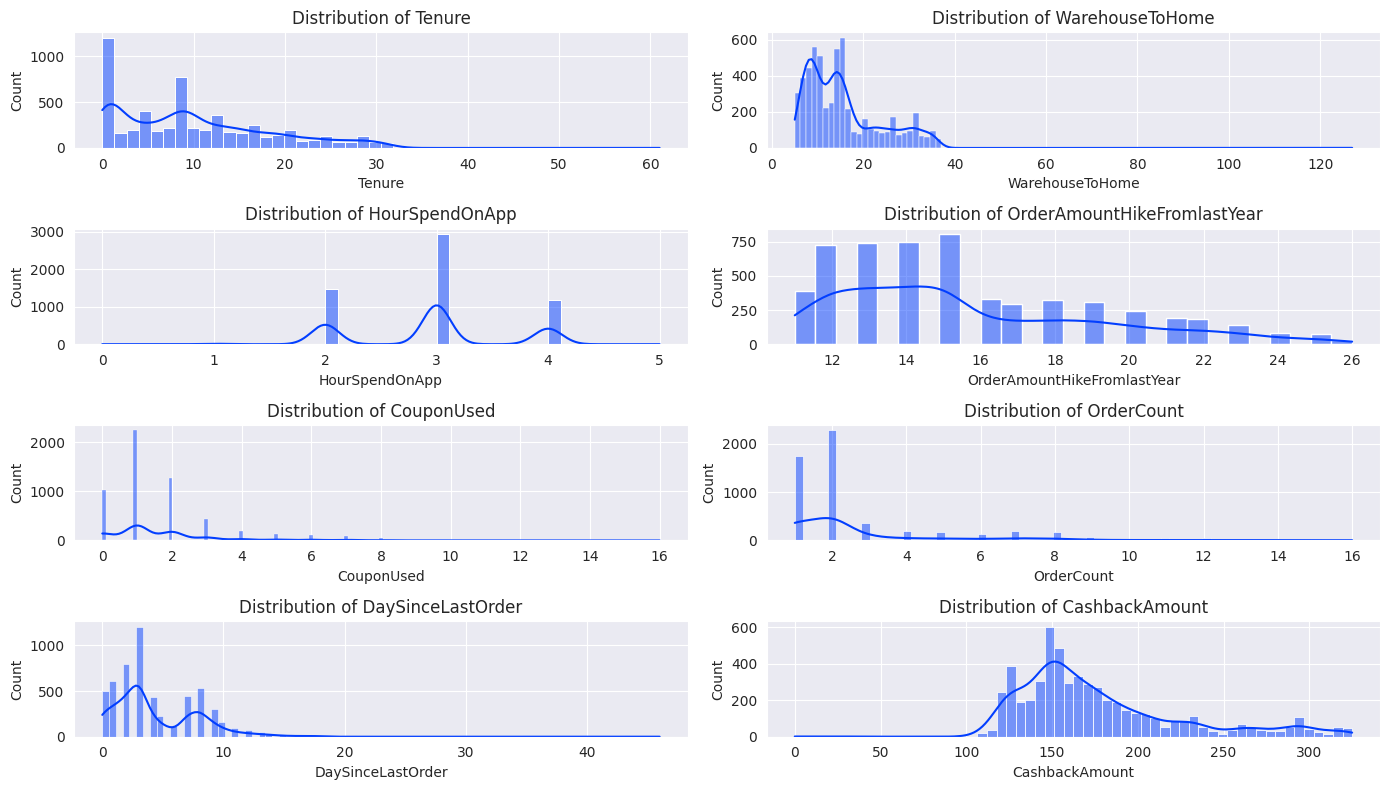

In [20]:
# plot the numerical columns
plot_variables(ecom_cus_df[numerical_columns])

<b> Insights</b>
1. **Tenure**: The distribution is heavily skewed to the right, with the majority of customers having a tenure of fewer than 10 years. This suggests that most customers are relatively new to the platform.
2. **WarehouseToHome**: The distance from the warehouse to the customer’s home shows a right-skewed distribution. Most customers are within a shorter distance range, with fewer customers living far away. This could impact delivery times and costs.
3. **HourSpendOnApp**: The distribution appears to be multimodal, with peaks around specific hours (e.g., 2, 3, and 4 hours). This suggests that customer usage of the app tends to cluster around certain time intervals, which might be driven by user habits or app engagement strategies.
4. **CouponUsed**: The distribution shows a high number of customers using very few or no coupons, with a steep decline as the number of coupons used increases. This suggests that while coupons are available, only a small portion of the customer base uses them frequently.
6. **OrderCount**: The order count distribution is similar to the coupon usage distribution, with most customers placing fewer orders, and only a small portion placing a high number of orders. This might indicate a need to encourage more frequent purchases among customers.
7. **DaySinceLastOrder**: The distribution indicates that a significant number of customers have placed an order recently, with the count dropping off as the days since the last order increase.
8. **CashbackAmount**: The cashback amount distribution shows a peak around certain cashback values, with a right-skewed tail. This suggests that cashback incentives are concentrated around specific values, which may be a result of structured promotions or reward tiers. <br>

<b>Overall Insights</b><br>
<b>Customer Engagement</b>: The data suggests that while most customers are relatively new (low tenure), they engage with the platform to a moderate extent, as seen in hours spent on the app and the number of orders placed. However, engagement drops off quickly for higher levels of interaction (e.g., order count, coupon usage).

**Promotions and Incentives**: Cashback amounts and coupon usage show that while promotional incentives are being utilized, they are not widespread among all customers. There may be an opportunity to increase engagement by optimizing these promotions.

**Logistics Impact**: The distance from the warehouse to home could impact delivery efficiency, and the distribution suggests that most customers are within a manageable range

### Categorical Distributions

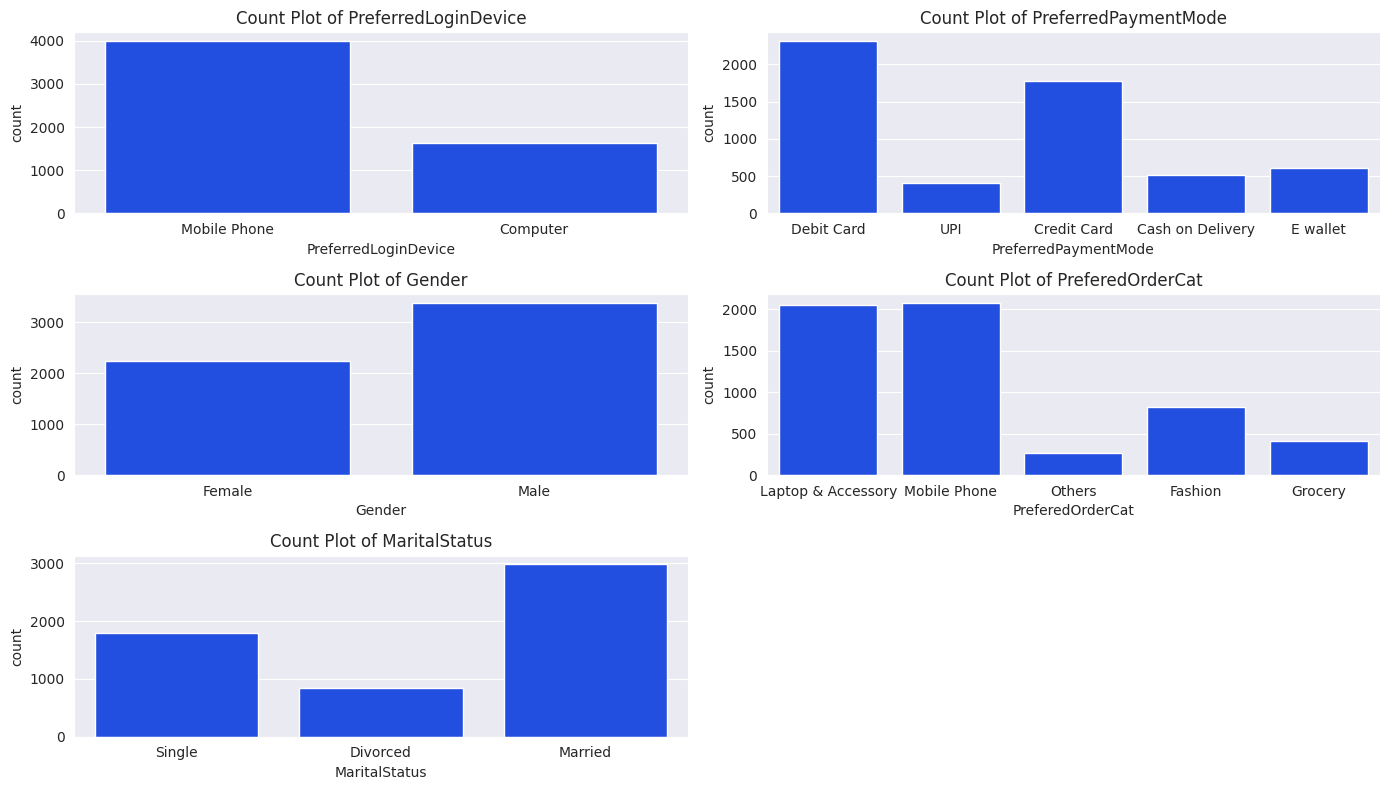

In [21]:
plot_variables(ecom_cus_df[categorical_columns])

1. **Preferred Login Device:**
   - **Mobile** is the most preferred login device by a significant margin, with more than double the users compared to **Computer**. This indicates that the majority of users prefer accessing the e-commerce platform via mobile devices, which might suggest that optimizing the mobile user experience is critical for customer satisfaction and engagement.
2. **Preferred Payment Mode:**
   - **Debit Card** is the most common payment method, followed by **Credit Card**. **UPI**, **Cash on Delivery**, and **E-wallet** are less popular. This suggests that users have a strong preference for card-based payments over other methods, which could influence promotional strategies or the development of new payment features.
3. **Gender Distribution:**
   - The dataset shows a higher number of **Male** customers compared to **Female** customers. Understanding the gender distribution can help in tailoring marketing strategies, product offerings, and customer engagement tactics to better align with the predominant customer base.
4. **Preferred Order Category:**
   - **Laptop & Accessory** and **Mobile Phone** are the most popular categories among customers, followed by **Fashion**. **Grocery** and **Others** categories are less favored. This distribution highlights which product categories are driving the most engagement and revenue, which can guide inventory and marketing focus.
5. **Marital Status:**
   - The majority of the customers are **Married**, followed by **Single** customers. **Divorced** customers represent a small segment of the user base. This demographic information can be useful for understanding customer lifestyles and preferences, which could inform targeted marketing campaigns or product recommendations.

**Overall Insights**:
- **Mobile-First Strategy:** Given the strong preference for mobile devices, it would be beneficial to focus on optimizing the mobile app and ensuring a seamless mobile shopping experience.
  
- **Payment Preferences:** The preference for debit and credit cards suggests that offering incentives or ensuring security for these payment methods could enhance customer trust and encourage more transactions.

- **Product Focus:** The high engagement in categories like **Laptop & Accessory** and **Mobile Phone** indicates that these areas could be further expanded or targeted in marketing efforts to maximize customer interest.

- **Demographic Targeting:** Understanding the gender and marital status distribution helps in creating personalized experiences or targeted campaigns. For instance, with a higher percentage of married customers, family-oriented promotions or products could be emphasized.

## Multivariate Analysis

In [22]:
# Create a function to plot the relationship among some categorical variables and churn rate
def plot_cat_churn_rate(col_var: str, df):
  """
  This function receives a column name and then plots the relationship between that column and the churn rate.

  Parameters:
  col_var (str): The name of the categorical column to plot.
  df (DataFrame): The DataFrame containing the data.
  """
  # Creating a long-form dataframe for your specific analysis
  long_df = df.groupby([col_var, 'Churn']).size().reset_index(name='count')

  # Using plotly express to create the bar plot
  fig = px.bar(
      long_df,
      x=col_var,
      y="count",
      color="Churn",
      title=f"Churn Rate by {col_var}",
      text='count'
  )

  # Customize the layout if necessary
  fig.update_layout(
      yaxis_title="Number of Customers",
      xaxis_title=f"{col_var}",
      title_x=0.5,
      width=800,
      height=500
  )

  # Show the figure
  fig.show()

In [23]:
# plot Preferred Categories and Churn
plot_cat_churn_rate('PreferedOrderCat', ecom_cus_df)

In [24]:
# plot Preferred Categories and Churn
plot_cat_churn_rate('PreferredLoginDevice', ecom_cus_df)

In [25]:
plot_cat_churn_rate('Tenure', ecom_cus_df)

In [26]:
plot_cat_churn_rate('PreferredPaymentMode', ecom_cus_df)

In [27]:
plot_cat_churn_rate('CityTier', ecom_cus_df)

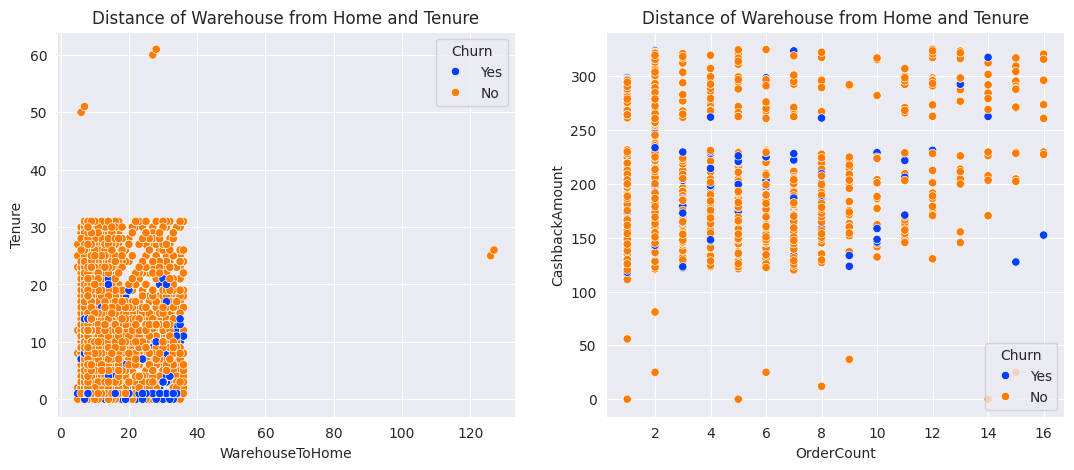

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))
axes = axes.flatten()
axes[0]=sns.scatterplot(data=ecom_cus_df, x='WarehouseToHome', y='Tenure', hue='Churn', ax=axes[0]).set(title = "Distance of Warehouse from Home and Tenure")
axes[1]=sns.scatterplot(data=ecom_cus_df, x='OrderCount', y='CashbackAmount', hue='Churn', ax=axes[1]).set(title = "Distance of Warehouse from Home and Tenure")

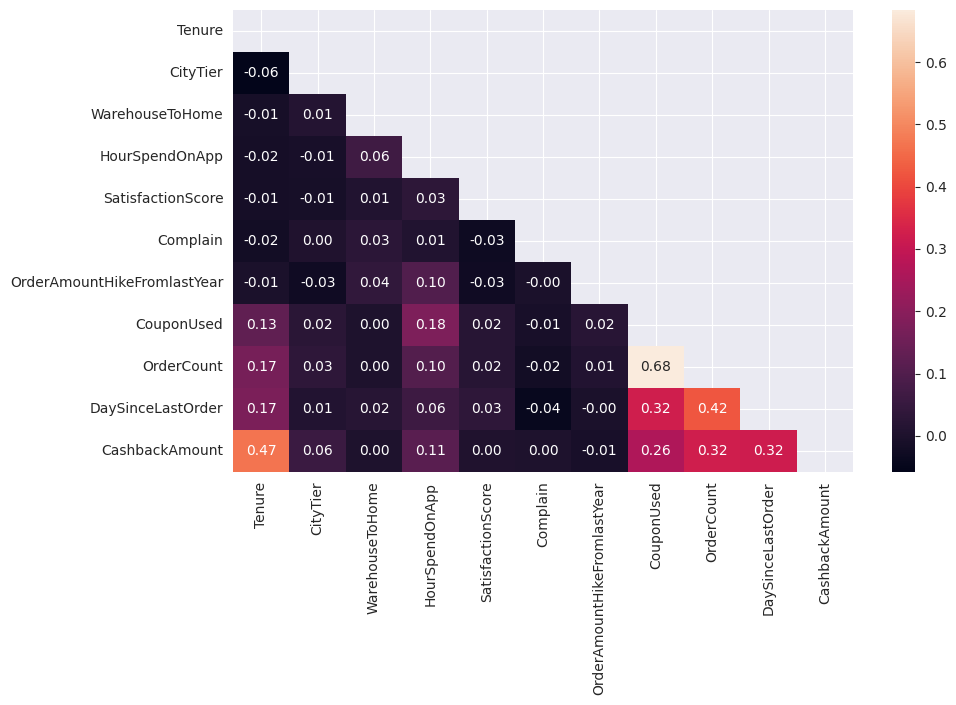

In [29]:
# plotting relationships
corr = ecom_cus_df.select_dtypes(exclude='object').corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", mask=np.triu(np.ones_like(ecom_cus_df.select_dtypes(exclude='object').corr(), dtype=bool)))
plt.show()


**Insights from the Visualizations and Analysis**
1. **Churn Rate by Preferred Order Category**:
   - **Mobile Phone** and **Laptop & Accessory** categories have the highest number of customers, but they also exhibit the highest churn rates.
   - **Fashion** has a lower overall customer base, but the churn rate seems significant when compared proportionally.
   - **Grocery** shows a low churn rate, which could indicate higher customer retention in this category.

2. **Churn Rate by Preferred Login Device**:
   - A majority of customers prefer using **Mobile Phones** to log in, but this group also has a higher churn rate compared to those using **Computers**.
   - The higher churn rate among mobile users could indicate issues related to the mobile experience, which may need attention.

3. **Churn Rate by Tenure**:
   - Customers with a lower tenure (less time with the company) are more likely to churn. This trend sharply decreases as tenure increases, suggesting that the longer customers stay, the less likely they are to churn.
   - Efforts to engage and retain customers in their early stages could reduce overall churn.

4. **Scatter Plot Analysis**:
   - **Warehouse Distance and Tenure**: No clear pattern is visible in how the distance from the warehouse affects tenure. This suggests that distance may not be a critical factor in customer retention.
   - **Order Count and Cashback Amount**: Customers who order more frequently seem to receive higher cashback amounts, which is logical. However, this doesn't seem to significantly impact churn, indicating other factors may be at play in customer loyalty.

5. **Correlation Heatmap**:
   - **Churn** is negatively correlated with **Tenure** (`-0.35`), which aligns with the observation that customers with longer tenure are less likely to churn.
   - **Cashback Amount** is moderately correlated with **Tenure** (`0.48`), indicating that longer-tenured customers tend to receive more cashback, possibly as part of retention strategies.
   - **Order Count** and **Coupon Used** are strongly correlated (`0.74`), which suggests that customers who frequently order also use more coupons. This could indicate that coupons are an effective tool for encouraging repeat purchases.

**Actionable Recommendations:**
1. **Targeted Retention Strategies**:
   - Focus on improving the experience for customers with lower tenure, perhaps through personalized engagement or offers, to reduce early-stage churn.
   - Investigate the mobile experience, as a significant portion of churn comes from mobile users.

2. **Category-Specific Interventions**:
   - Categories like **Fashion** and **Mobile Phones** may need targeted strategies to reduce churn. This could involve tailored loyalty programs or personalized marketing.

3. **Enhance Loyalty Programs**:
   - Given the positive correlation between cashback and tenure, enhancing loyalty programs for long-tenured customers might further reduce churn.

# Preparing Data For Models

In [30]:
# split the data into training and testing sets
X = ecom_cus_df.drop('Churn', axis=1)
y = ecom_cus_df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
# Get the columns to transpose
bin_cols = X_train[X_train.nunique()[X_train.nunique() == 2].index]
multi_cols = X_train[X_train.nunique()[X_train.nunique() > 2].index]

bin_cols = bin_cols.select_dtypes(exclude='int64').columns
multi_cols = multi_cols.select_dtypes(exclude=['int64','float64']).columns
numerical_columns = X_train.select_dtypes(exclude='object').columns


print(f"Binary columns {bin_cols}\n")
print(f"Multi-class columns {multi_cols}\n")
print(f"Numerical columns {numerical_columns}")

Binary columns Index(['PreferredLoginDevice', 'Gender'], dtype='object')

Multi-class columns Index(['PreferredPaymentMode', 'PreferedOrderCat', 'MaritalStatus'], dtype='object')

Numerical columns Index(['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'SatisfactionScore', 'Complain', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')


In [39]:
# create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('bin', OrdinalEncoder(), bin_cols),
        ('multi', OneHotEncoder(drop='first'), multi_cols),
        ('numerical', MinMaxScaler(), numerical_columns)
    ])

# save the preprocessor
joblib.dump(preprocessor, 'preprocessor.pkl')

['preprocessor.pkl']

In [40]:
# Transform both X train and test with the preprocessor, save both data together with their targets to csv
X_train_trans = preprocessor.fit_transform(X_train)
X_test_trans = preprocessor.transform(X_test)

# transform the targets too
le = LabelEncoder()
y_train_trans = le.fit_transform(y_train)
y_test_trans = le.transform(y_test)

# convert back to Dataframe and put them in the preprocessed data
training_set = pd.DataFrame(X_train_trans)
testing_set = pd.DataFrame(X_test_trans)

training_set['Target'] = y_train_trans
testing_set['Target'] = y_test_trans

# append training to testing
preprocessed_df = pd.concat([training_set,testing_set], ignore_index=True, axis=True)

# save the preprocessed data
preprocessed_df.to_csv('preprocessed_data.csv', index=False)